In [9]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
from qiskit import *
qc = QuantumCircuit(2)
c = 0
t = 1

In [18]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
print(qc.draw())
backend = Aer.get_backend('statevector_simulator')
job = assemble(qc)
output = backend.run(job).result().get_statevector()
print(output)

                                      
q_0: ─────────────■────────────────■──
     ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ RY(π/2) ├┤ X ├┤ RY(-π/2) ├┤ X ├
     └─────────┘└───┘└──────────┘└───┘
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [14]:
#v gate
qcv = QuantumCircuit(2, 2)
thetaa = pi
qcv.rx(thetaa/2, 1)
qcv.cx(0, 1)
qcv.measure(1, 0)
qcv.draw()
backend = Aer.get_backend('statevector_simulator')
job = assemble(qcv)
output = backend.run(job).result().get_statevector()
output

array([0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j])

In [31]:
#v gate act as a not gate --- vv = not
def VG(inp1, inp2):
    qcv = QuantumCircuit(3, 1)
    qcv.reset(range(3))
    
    if inp1 == '1':
        qcv.x(0)
    if inp2 == '1':
        qcv.x(1)
    
    thetaa = pi
    qcv.rx(thetaa/2, 1)
    qcv.cx(0, 1)
    qcv.rx(thetaa/2, 1)
    qcv.cx(0, 1)

    qcv.measure(1, 0)
   
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qcv, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qcv, output

v gate input is  0 0 output is  1
v gate input is  0 1 output is  0
v gate input is  1 0 output is  1
v gate input is  1 1 output is  0


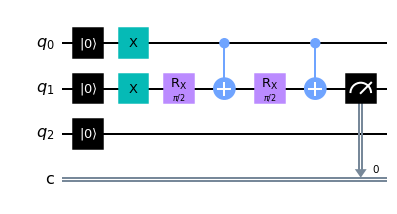

In [32]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = VG(inp1, inp2)
        print('v gate input is ', inp1, inp2, 'output is ', output)
qc.draw('mpl')

In [33]:
#v+ gate act as a not gate --- v+v+ = not
def VPG(inp1, inp2):
    qcv = QuantumCircuit(3, 1)
    qcv.reset(range(3))
    
    if inp1 == '1':
        qcv.x(0)
    if inp2 == '1':
        qcv.x(1)
    
    thetaa = pi
    qcv.rx(-thetaa/2, 1)
    qcv.cx(0, 1)
    qcv.rx(-thetaa/2, 1)
    qcv.cx(0, 1)

    qcv.measure(1, 0)
   
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qcv, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qcv, output

v gate input is  0 0 output is  1
v gate input is  0 1 output is  0
v gate input is  1 0 output is  1
v gate input is  1 1 output is  0


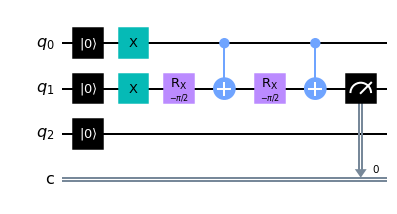

In [34]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = VPG(inp1, inp2)
        print('v gate input is ', inp1, inp2, 'output is ', output)
qc.draw('mpl')

In [38]:
#v and v+ gate act as a not gate --- v v+ = 1
def VG1(inp1, inp2):
    qcv = QuantumCircuit(2, 1)
    qcv.reset(range(2))
    
    if inp1 == '1':
        qcv.x(0)
    if inp2 == '1':
        qcv.x(1)
    
    thetaa = pi
    qcv.rx(thetaa/2, 1)
    qcv.cx(0, 1)
    qcv.rx(-thetaa/2, 1)
    qcv.cx(0, 1)

    qcv.measure(1, 0)
   
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qcv, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qcv, output

v gate input is  0 0 output is  0
v gate input is  0 1 output is  1
v gate input is  1 0 output is  0
v gate input is  1 1 output is  1


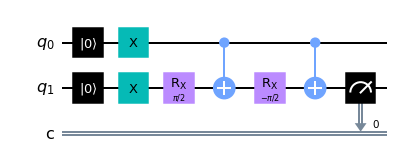

In [39]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = VG1(inp1, inp2)
        print('v gate input is ', inp1, inp2, 'output is ', output)
qc.draw('mpl')